In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import preprocessing
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport
from sklearn import metrics
import pickle

plt.style.use("default")

In [2]:
# read our fresh preprocessed data from previous notebook

data = pd.read_csv("preprocessed_features.csv",index_col="Unnamed: 0")

In [3]:
X = data.drop("classes", axis = 1)
y = data.classes

 We now have to split our data into training and testing sets. 
 The train_test_split will take our 1000 data and split it into 2
 To do so, it will randomly select data and split in 2
 We will use a ratio of 800 and 200 for training and testing respectively
 We have to stratify the split, our data is well separated in 100 of each class
So we need to keep that proportion when we split.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y)

In [5]:
# Instanciate a KNearest Object
clf = neighbors.KNeighborsClassifier()

# Pass X_train as training data to the model
clf.fit(X_train, y_train);

//anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:234: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


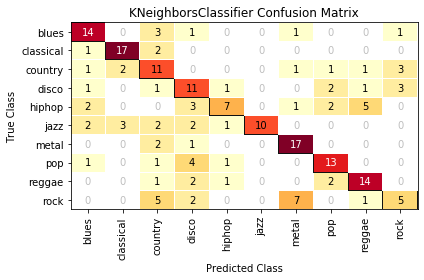

In [7]:
# See the results in a confusion matrix
clf_cm = ConfusionMatrix(clf)
clf_cm.score(X_test,y_test)
clf_cm.show()

//anaconda3/lib/python3.7/site-packages/yellowbrick/classifier/base.py:234: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


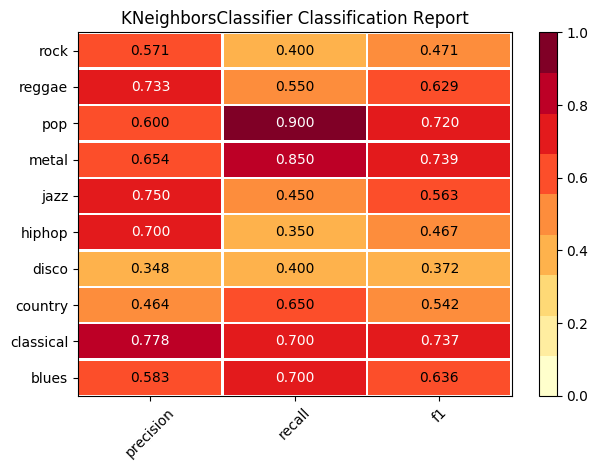

In [15]:
# And in a classification report

clf_report = ClassificationReport(clf)
clf_report.score(X_test,y_test)
clf_report.show();

In [16]:
# Classification report could also be show like that:
# Now we can evaluate the model
y_expect = y_test
y_pred = clf.predict(X_test)

print(metrics.classification_report(y_expect, y_pred))

              precision    recall  f1-score   support

       blues       0.58      0.70      0.64        20
   classical       0.78      0.70      0.74        20
     country       0.46      0.65      0.54        20
       disco       0.35      0.40      0.37        20
      hiphop       0.70      0.35      0.47        20
        jazz       0.75      0.45      0.56        20
       metal       0.65      0.85      0.74        20
         pop       0.60      0.90      0.72        20
      reggae       0.73      0.55      0.63        20
        rock       0.57      0.40      0.47        20

    accuracy                           0.59       200
   macro avg       0.62      0.59      0.59       200
weighted avg       0.62      0.59      0.59       200



Here is a classification report where we see **precision**, **recall** and **f1 score**.  
- Precision is the proportion of true positive with true positive and false positive  
- Recall is the proportion of true positive with the relevant instances (true positive and false negative)  
- f1 score is the harmonic mean of precision and recall.

It is not that good.

In [43]:
pickle.dump(clf, open("model_test_knn.sav","wb"))